In [43]:
import pandas as pd
import os
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import inv
from scipy.sparse import diags
from tqdm import tqdm
import networkx as nx
import scipy.sparse
import matplotlib.pyplot as plt

os.getcwd()

'/Users/jonnycodd/Documents/MASTERS/Networks/RecommendationSystems_NetworksFP/code'

# Load data

In [44]:
# Load bi-partide network
bi_partide_network =  pd.read_csv("../output/collbarfilter.csv")

In [45]:
bi_partide_network.drop(bi_partide_network.columns[0], axis=1, inplace=True)
bi_partide_network.reset_index(drop=True, inplace=True)
bi_partide_network = bi_partide_network.fillna(0)
bi_partide_network_sparse = csr_matrix(bi_partide_network)
bi_partide_network


,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# Create binary matrix 
binary_network = bi_partide_network.copy()
binary_network.iloc[:, 1:] = (binary_network.iloc[:, 1:] != 0).astype(int)
binary_network = binary_network.fillna(0)

# Convert to sparse matrix
binary_network_sparse = csr_matrix(binary_network.values)

binary_network


,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Algorithms

## With ratings

In [47]:
def probabilistic_spreading_with_ratings(user_item_matrix, user_index, K=9719):
    
    # Create vector of the movies the individual has seen and their ratings
    seen_movies = user_item_matrix[user_index, :]
    ratings = bi_partide_network_sparse[user_index, :]
    
    # Calculate the degree (sum) of each movie and user
    movie_degree = user_item_matrix.sum(axis=0)
    user_degree = user_item_matrix.sum(axis=1)
    
    # Calculate the inverse degree of each movie and user
    movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
    user_degree_inv = diags(1.0 / user_degree.A.ravel(), offsets=0)
    
    # Weighting seen movies by their ratings and inverse movie degree
    seen_movies_weighted = movie_degree_inv.dot(ratings.T)
    
    # Distribute resources of movies to the users
    resource_to_user = user_item_matrix.dot(seen_movies_weighted)
    
    # Weighting resources to users by inverse user degree
    resource_to_user_weighted = user_degree_inv.dot(resource_to_user)
    
    # Calculate final movie weights
    final_movie_weights = user_item_matrix.T.dot(resource_to_user_weighted)
    final_movie_weights = final_movie_weights.T  # Transpose to match original shape
    
    # Zero out the movies already seen
    final_movie_weights[0, seen_movies.nonzero()[1]] = 0
    
    # Convert to dense for argsort operation
    final_movie_weights_dense = np.array(final_movie_weights.todense()).ravel()

    # Get the indices of the top K values
    top_k_indices = np.argsort(final_movie_weights_dense)[-K:][::-1]

    # Select the K highest weights
    top_k_weights = final_movie_weights_dense[top_k_indices]

    return top_k_weights, top_k_indices


In [48]:
weights, indices = probabilistic_spreading_with_ratings(binary_network_sparse, 0, 10)

/var/folders/js/pnl2ymz143j6txn5bftwltm40000gn/T/ipykernel_6703/473928346.py:12: RuntimeWarning: divide by zero encountered in divide
  movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)


## Binary

In [49]:
def probabilistic_spreading_binary(user_item_sparse, user_index, K = 9719):
    
    # Create vector of the movies the individual has seen
    seen_movies = user_item_sparse[user_index, :]
    
    # Calculate the degree (sum) of each movie and user
    movie_degree = user_item_sparse.sum(axis=0)
    user_degree = user_item_sparse.sum(axis=1)
    
    # Calculate the inverse degree of each movie and user
    movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
    user_degree_inv = diags(1.0 / user_degree.A.ravel(), offsets=0)
    
    # Weighting seen movies by inverse movie degree
    seen_movies_weighted = movie_degree_inv.dot(seen_movies.T)
    
    # Distribute resources of movies to the users
    resource_to_user = user_item_sparse.dot(seen_movies_weighted)
    
    # Weighting resources to users by inverse user degree
    resource_to_user_weighted = user_degree_inv.dot(resource_to_user)
    
    # Calculate final movie weights
    final_movie_weights = user_item_sparse.T.dot(resource_to_user_weighted)
    final_movie_weights = final_movie_weights.T  # Transpose to match original shape
    
    # Zero out the movies already seen
    final_movie_weights[0, seen_movies.nonzero()[1]] = 0
    
    # Convert to dense for argsort operation
    final_movie_weights_dense = np.array(final_movie_weights.todense()).ravel()

    # Get the indices of the top K values
    top_k_indices = np.argsort(final_movie_weights_dense)[-K:][::-1]

    # Select the K highest weights
    top_k_weights = final_movie_weights_dense[top_k_indices]
    

    return top_k_weights,  top_k_indices



In [50]:
weights, indices = probabilistic_spreading_binary(binary_network_sparse, 0, 10)

/var/folders/js/pnl2ymz143j6txn5bftwltm40000gn/T/ipykernel_6703/1982918487.py:11: RuntimeWarning: divide by zero encountered in divide
  movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)


In [84]:
test_array  = np.array([
    [1, 0, 0, 1, 0],
    [1, 1, 1, 1, 0],
    [1, 0, 1, , 0],
    [0, 0, 1, 0, 1]
    ])
test = csr_matrix(test_array)

weights, indices = probabilistic_spreading_binary(test, 0, 3)
weights, indices

# Evaluate recommendations over time

In [51]:
# Define a function to plot the movie degree after different iterations
def movie_degree_rank_plot(movie_degrees, num_iterations):
    sorted_indices = np.argsort(movie_degrees)[::-1]
    sorted_degrees = movie_degrees[sorted_indices]
    ranks = np.arange(1, len(movie_degrees) + 1)

    # Plotting degree rank plot
    plt.plot(ranks, sorted_degrees, marker='o', linestyle='-', color='b')
    plt.title(f'Degree Rank Plot after {num_iterations} iterations')
    plt.xlabel('Rank')
    plt.ylabel('Degree')
    plt.xscale('log')  # Set x-axis to logarithmic scale
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.savefig(f'../figures/Prob S movie rank plot - {num_iterations} iterations')
    plt.show()


In [52]:
# Define a function to plot the movie degree after the algorithm has run
def plot_recomendation_counts(reccomendation_counts, num_iterations):
    
    # Example column labels from the bipartite network (replace it with your actual data)
    column_labels = bi_partide_network.columns

    # Get indices of nonzero movie degree values
    nonzero_indices = np.where(reccomendation_counts != 0)[0]

    # Filtered movie degree array and corresponding labels
    filtered_movie_degree = reccomendation_counts[nonzero_indices]
    filtered_column_labels = [column_labels[i] for i in nonzero_indices]

    # Sort filtered movie degree array and corresponding labels
    sorted_indices = np.argsort(filtered_movie_degree)[::-1]
    sorted_filtered_movie_degree = filtered_movie_degree[sorted_indices][:500]
    sorted_filtered_column_labels = [filtered_column_labels[i] for i in sorted_indices][:500]

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_filtered_movie_degree)), sorted_filtered_movie_degree)
    # Removed xticks setting for labels
    plt.title(f'Recommendations count after {num_iterations} iterations')
    plt.ylabel('Recommendation Count')
    plt.xlabel('Rank')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.savefig(f'../figures/Prob S movie recommendations - {num_iterations} iterations')
    plt.show()

In [53]:
# Plot evoloution of reccomended movies over time
def temporal_recommendations(binary_network_sparse, iterations, plot_points = [], algorithm = probabilistic_spreading_binary):
    # Calculate initial movie degrees
    movie_degrees = np.array(binary_network_sparse.sum(axis=0)).squeeze()
    reccomendation_counts = np.zeros(len(movie_degrees))

    for j in tqdm(range(1, iterations + 1), desc="Progress"):
        recommendations = []

        # Loop over users
        for i in range(binary_network_sparse.shape[0]):
            # Get index of top recommended film
            _, index = algorithm(binary_network_sparse, i, 1)
            recommendations.append((i, index[0]))
            reccomendation_counts[index[0]] += 1

        # Update matrix 
        row_indices, col_indices = zip(*recommendations)
        binary_network_sparse[row_indices, col_indices] = 1

        # Update movie degrees
        updated_degrees = np.array(binary_network_sparse.sum(axis=0)).squeeze()
        movie_degrees += updated_degrees - movie_degrees

        # Store degree information at plot_points iterations
        if j in plot_points:
            movie_degree_rank_plot(movie_degrees, j)
            plot_recomendation_counts(reccomendation_counts, j)


    return binary_network_sparse, movie_degrees, reccomendation_counts

In [54]:
binary_network_sparse, movie_degrees, reccomendation_counts = temporal_recommendations(binary_network_sparse, 100, [10, 100])

Progress:   0%|          | 0/100 [00:00<?, ?it/s]/var/folders/js/pnl2ymz143j6txn5bftwltm40000gn/T/ipykernel_6703/473928346.py:12: RuntimeWarning: divide by zero encountered in divide
  movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
/Users/jonnycodd/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
Progress:   9%|▉         | 9/100 [00:13<02:19,  1.53s/it]

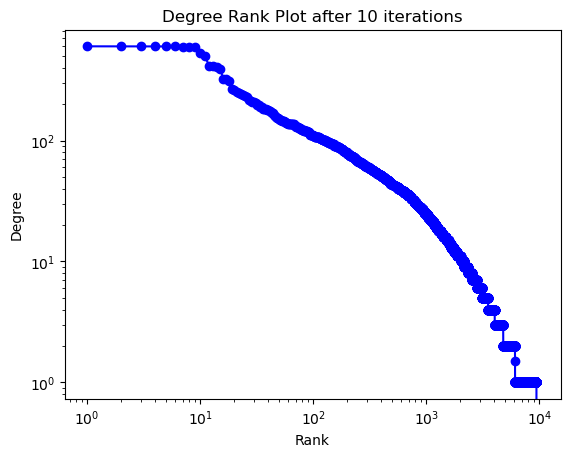

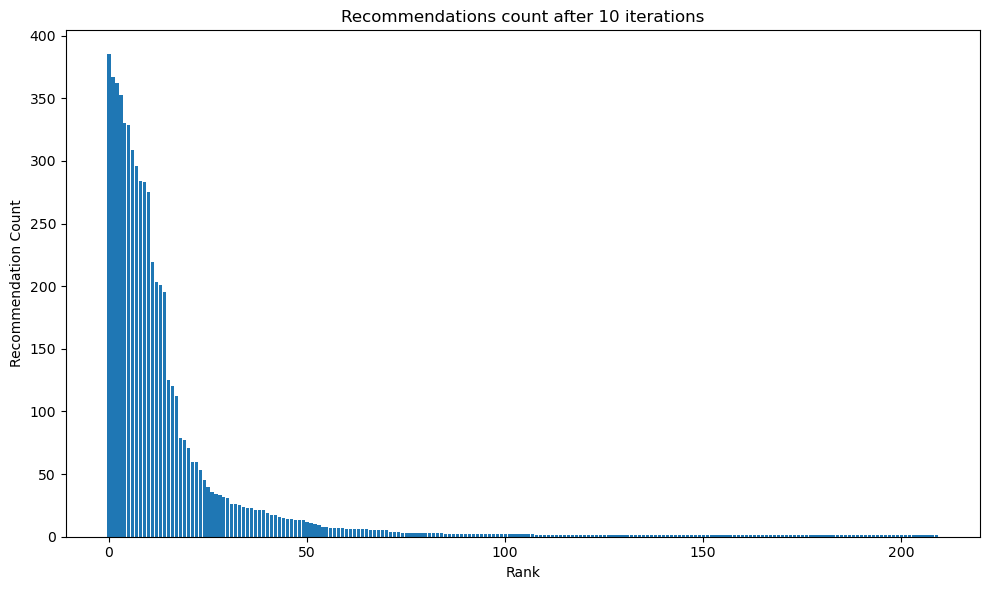

Progress:  99%|█████████▉| 99/100 [02:51<00:01,  1.89s/it]

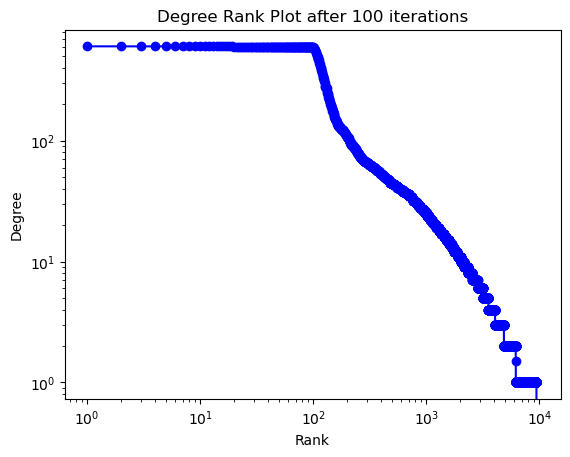

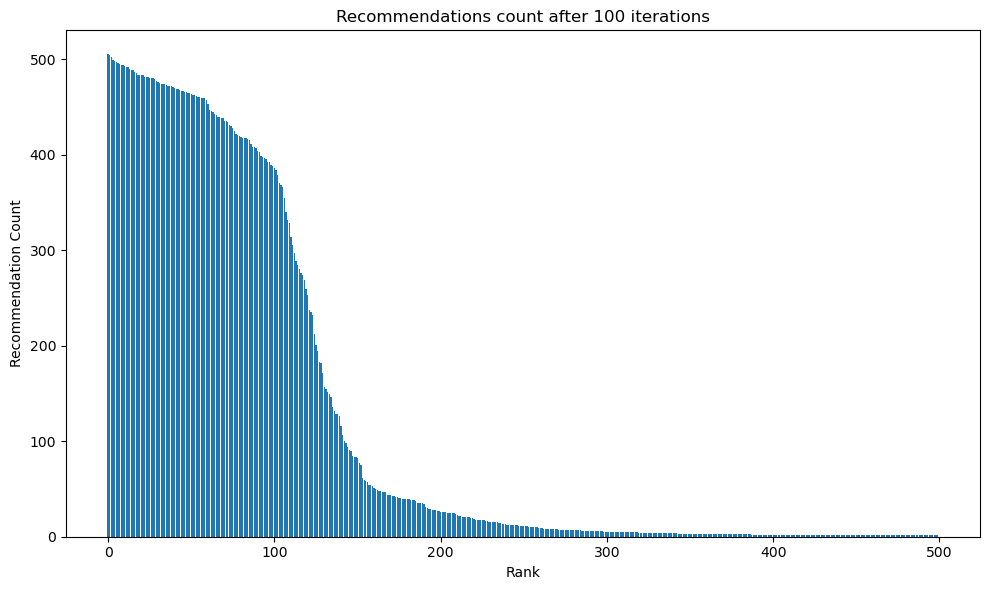

Progress: 100%|██████████| 100/100 [02:53<00:00,  1.74s/it]


In [55]:
binary_network_sparse, movie_degrees, reccomendation_counts = temporal_recommendations(binary_network_sparse, 100, [10, 100], probabilistic_spreading_with_ratings)

# Out of sample performance

In [60]:
def train_test_split(df, perc):
    # Ensure `perc` is between 0 and 1
    perc = max(min(perc, 1), 0)

    train = df.copy()
    
    # Create the DataFrame for removed ratings with the same structure as `df`
    removed_ratings_df = pd.DataFrame(index=train.index, columns=train.columns)
    
    # Iterate over each user in the DataFrame
    for user in tqdm(train.index, desc = "Train-test split user: "):
        # Get indices of the non-NaN ratings for the user
        user_ratings = train.loc[user]
        non_nan_indices = user_ratings[user_ratings.notna()].index
        
        # Calculate the number of ratings to remove for the user
        num_to_remove = int(len(non_nan_indices) * perc)
        
        # Randomly select indices (movies) to remove
        indices_to_remove = np.random.choice(non_nan_indices, size=num_to_remove, replace=False)
        
        # Set the selected ratings to NaN in `df` and move them to `removed_ratings_df`
        for movie in indices_to_remove:
            removed_ratings_df.at[user, movie] = train.at[user, movie]
            train.at[user, movie] = np.nan
    
    # Optionally, you can fill NaN values with 0 or another value in both DataFrames
    train.fillna(0, inplace=True)
    removed_ratings_df.fillna(0, inplace=True)
    
    return train, removed_ratings_df

In [77]:
def calculate_average_precision_recall(network, recommendation_algorithm):

    # Initialize lists to store precision and recall for each user
    precisions = []
    recalls = []
    precisions_hrated = []
    
    # Split the data for each user
    train, test = train_test_split(network, 0.2)
    
    # Convert to sparse matrix
    train_sparse = csr_matrix(train.values)
    test_sparse = csr_matrix(test.values)
    
    # Iterate over each user to compute metrics
    for user_id in tqdm(range(test.shape[0]), desc = "Computing metrics"):
        # Make predictions using the provided recommendation algorithm
        test_weights, test_indices = recommendation_algorithm(train_sparse, user_id)
        
        # Non-zero recommendations
        test_indices_non_zero = test_indices[test_weights != 0]
        
        # Indentiify films held out in test
        films_watched = test.iloc[user_id][test.iloc[user_id] > 0]
        films_watched_index = bi_partide_network.columns.get_indexer(films_watched.index)

        # Identify highly rated films in test set
        films_watched_hrated = test.iloc[user_id][(test.iloc[user_id] > 0) & (bi_partide_network.iloc[user_id] > 0)]
        films_watched_index_hrated = bi_partide_network.columns.get_indexer(films_watched_hrated.index)

        # Precision (considering top 20 recommendations)
        recs_are_relevant = [index for index in test_indices_non_zero[:20] if index in films_watched_index]
        precision = (len(recs_are_relevant) / 20) * 100
        precisions.append(precision)

        # Precision of high rated movies
        recs_are_relevant_hrated = [index for index in test_indices_non_zero[:20] if index in films_watched_index_hrated]
        precision_hrated = (len(recs_are_relevant_hrated) / len(test_indices_non_zero[:20])) * 100
        precisions_hrated.append(precision_hrated)
        
        # Recall (if a user has seen X films, we only consider the first X number of recommendations)
        relevent_are_rec = [index for index in films_watched_index if index in test_indices_non_zero[:len(films_watched_index)]] # relevant items that are recommended.
        recall = (len(relevent_are_rec) / len(films_watched_index)) * 100 if films_watched_index.size > 0 else 0
        recalls.append(recall)
    
    # Calculate average precision and recall
    average_precision = np.mean(precisions)
    average_precision_hrated = np.mean(precisions_hrated)
    average_recall = np.mean(recalls)
    
    return average_precision, average_recall, average_precision_hrated


In [78]:
precision, recall, precision_hrated = calculate_average_precision_recall(binary_network, probabilistic_spreading_binary)
precision, recall, precision_hrated

Computing metrics:   0%|          | 0/610 [00:00<?, ?it/s]/var/folders/js/pnl2ymz143j6txn5bftwltm40000gn/T/ipykernel_6703/1982918487.py:11: RuntimeWarning: divide by zero encountered in divide
  movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
Computing metrics: 100%|██████████| 610/610 [00:16<00:00, 36.74it/s]


(18.66393442622951, 17.373103133012066, 17.475409836065573)

In [76]:
precision_ratings, recall_ratings, precision_hratedratings = calculate_average_precision_recall(binary_network, probabilistic_spreading_with_ratings)
precision_ratings, recall_ratings, precision_hratedratings

Computing metrics:   0%|          | 0/610 [00:00<?, ?it/s]/var/folders/js/pnl2ymz143j6txn5bftwltm40000gn/T/ipykernel_6703/473928346.py:12: RuntimeWarning: divide by zero encountered in divide
  movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
Computing metrics: 100%|██████████| 610/610 [00:16<00:00, 36.49it/s]


(19.860655737704917, 20.3693648574329, 19.098360655737704)